# Naloga: Dušeno nihanje

## Navodilo

Vzmetno nihalo s koeficientom vzmeti k = 10 N/m in maso uteži 1 kg izmaknemo za 1 cm od ravno vesne lege in izpustimo, da zaniha. Nariši časovni potek odmika, če utež drsi na tanki plasti olja, ki ustvari viskozno silo F = beta * v. Izberi ustrezno velikost dusenja in narisi grafe za mocno in sibko duseno nihanje.

## Uvod

Problem rešimo iterativno. Trenutni pospešek uteži znamo zapisati kot funkcijo odmika in hitrosti, odmik in hitrost pa lahko izračunam iz trenutnega pospeška in privzetku, da se v zelo kratkem časovnem intervalu pospešek ne spremeni bistveno. Zato lahko za vsak kasnejši čas izračunam odmik in hitrost iz enačb za enakomerno pospešeno gibanje. Seveda, tak pristo fukncionira zgolj če je časovni korak dovolj kratek, kar bomo v nadaljevanju preverili.

## Implementacija

OPOMBA: vrstice v notebooku poganjamo s shift-enter. Nastavljene morate imeti knjiznice numpy in matplotlib


In [15]:
# Najprej uvozimo vse kar potrebujemo
import numpy as np
import matplotlib.pyplot as plt

# nato definiramo vse funkcije, ki jih potrebujemo


def sila(x, v, beta = 1, k = 10):
    """Izračuna trenutno silo, ki jo čuti utež iz odmika x, hitrosti v, koeficienta vzmeti k in dušenja beta""" 
    return -k*x - beta*v

def pospesek(f, m):
    """Izračuna pospešek telesa iz sile f in mase m""" 
    return f/m

def hitrost(v0, a0, dt = 0.01):
    """Izracuna hitrost ob zakasnjenem casu iz zacetne hitrosti v0, zacetnega pospeska a in zakasnitve dt"""
    return v0 + a0*dt

def odmik(x0, v0, dt = 0.01):
    """Izracuna odmik ob zakasnjenem casu iz zacetnega odmika x0, zacetne hitrosti v0, zakasnitve dt"""
    return x0 + v0*dt

def izracunaj(tmax = 100, dt = 0.01, beta = 1, k = 10, x0 = 0.01, v0 = 0., m = 1):
    """Resi problem naloge.
    
    Parameters
    ----------
    tmax : float
        Koncni cas izracuna [s]
    dt : float
        Casovni korak (locljivost) [s]
    beta : float
        Koeficient dusenja [Ns/m]
    k : float
        Koeficient vzmeti [N/m]
    x0 : float
        Zacetni odmik (ob casu t = 0) [m]
    v0 : float
        Zacetna hitrost (ob casu t = 0) [m/s] 

    REturns
    -------
    t,x,v,a : output arrays
        Cas, odmik, hitrost in pospesek 
    """

    # najprej zapisimo case pri katerih bomo izracunali 
    t = np.arange(0, tmax, dt)

    # zacetni pospesek
    a0 = pospesek(sila(x0,v0,beta,k),m)

    # x,v,a bodo list-type, saj bomo dodajali elemente 
    # x[0], v[0], a[0] je so torej zacetni pogoji, vnesimo jih tukaj
    a = [a0] 
    v = [v0] 
    x = [x0] 

    # za vse nadaljne case bomo izracunali xi,vi,ai, kjer i tece od indeksa 1 do koncnega indeksa,
    # ki pripada koncnemu casu. Koliko tock bomo izracunali je seveda odvsno od locljivosti dt
 
    for i in range(1, len(t)): # for zanka tece od i= 1 naprej
        #trenutno hitrost in pospesek izracunamo iz podatkov prejsnje iteracije v[i-1], x[i-1]
        vi = hitrost(v[i-1],a[i-1], dt)
        xi = odmik(x[i-1], v[i-1], dt)
        # trenutni pospesek pa izracunamo iz trenutnega odmika xi in hitrosti vi
        ai = pospesek(sila(xi,vi,beta,k),m)

        #ok, shranimo rezultate
        a.append(ai)
        v.append(vi)
        x.append(xi)
    
    # konverzija v np.array. Tole sicer ni potrebno, vendar olajsa delo s podatki v nadaljevanju
    x = np.asarray(x)
    v = np.asarray(v)
    a = np.asarray(a)

    return t,x,v,a
    

# Rezultati

Spodaj so rezultati izracuna pri razlicnih vrednostih casovnega koraka (locljivosti) in pri razlicnih vrednostih parametra dusenja. Pomembno je, da preverimo, ali je izbrana locljivost dt dovolj majhna. 

Vidimo, da je za majhen koeficient dusenja potrebno povecati locljivost, saj v nasprotnem rezultati divergirajo. To je posledica numericne napake, ki jo povzroci premajhen casovni korak.

Izberemo tri razlicne beta koeficiente dusenja, ki pripadajo nadkriticnemu dusenju (utez se samo vrne v izhodisce), mocnemu dusenju, kjer utez naredi samo nekaj nihajev in sibkemu dusenju, kjer se utez zgolj pocasi izniha.

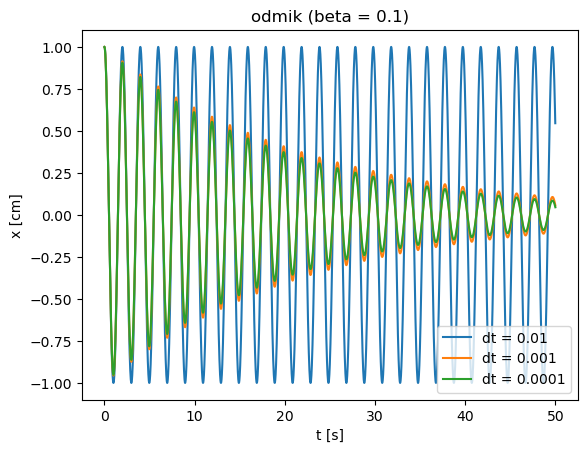

In [34]:
DT = [0.01,0.001,0.0001]

for dt in DT:
    t,x,v,a = izracunaj(tmax = 50, beta = 0.1, dt = dt)
    plt.plot(t,x*100, label = f"dt = {dt}")
    
plt.title("odmik (beta = 0.1)")
plt.ylabel("x [cm]")
plt.xlabel("t [s]")
plt.legend()

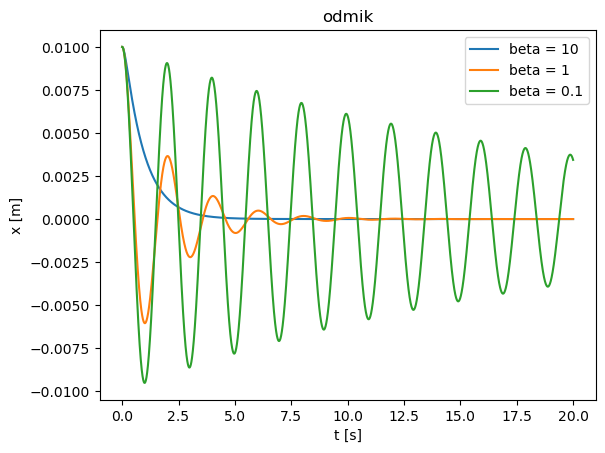

In [35]:
BETA = (10,1,0.1)

for beta in BETA:
    t,x,v,a = izracunaj(tmax = 20, beta = beta, dt = 0.001)
    plt.plot(t,x, label = f"beta = {beta}")
    
plt.title("odmik")
plt.ylabel("x [m]")
plt.xlabel("t [s]")
plt.legend()

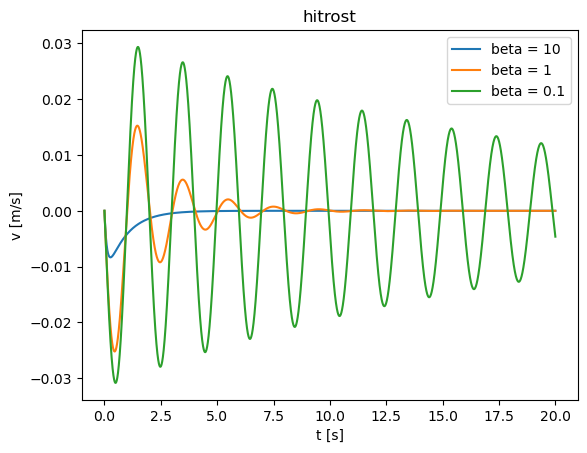

In [36]:
for beta in BETA:
    t,x,v,a = izracunaj(tmax = 20, beta = beta, dt = 0.001)
    plt.plot(t,v, label = f"beta = {beta}")
    
plt.title("hitrost")
plt.ylabel("v [m/s]")
plt.xlabel("t [s]")
plt.legend()

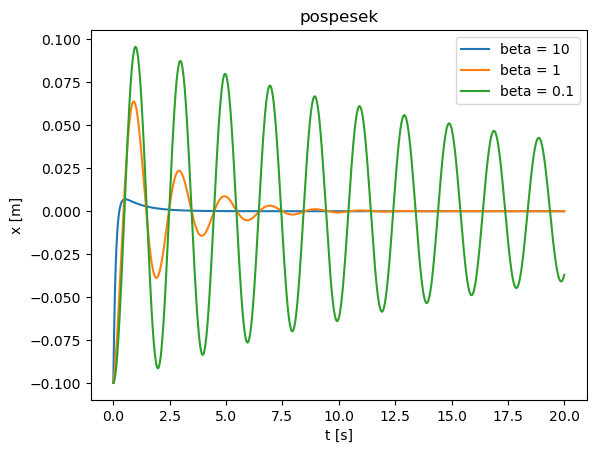

In [13]:
for beta in BETA:
    t,x,v,a = izracunaj(tmax = 20, beta = beta, dt = 0.001)
    plt.plot(t,a, label = f"beta = {beta}")
    
plt.title("pospesek")
plt.ylabel("a [m/s2]")
plt.xlabel("t [s]")
plt.legend()